In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from PIL import Image


/Users/hannes/.virtualenvs/osb_ml101/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [40]:
# image parameters
img_rows, img_cols = 100, 100
img_channels = 3

In [41]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 2, 2))
model.add(Activation('relu'))
model.add(Convolution2D(32, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 2, 2, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Convolution2D(64, 2, 2, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Convolution2D(64, 2, 2, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 2, 2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [42]:
model.load_weights('trained_model/weights_91.hdf5')

(100, 100, 3)

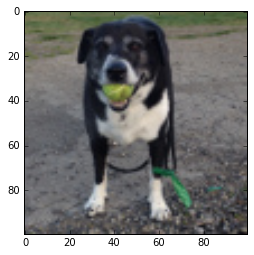

In [43]:
# load an image and convert to a matrix
image = Image.open('test_images/dog.jpg')
image.load()
image_matrix_int32 = np.asarray(image, dtype="int32")
image_matrix = np.asarray(image)
plt.imshow(image_matrix)
image_matrix.shape

In [37]:
model.predict(np.expand_dims(image_matrix.T, axis=0))

array([[ 1.,  0.]])

(100, 100, 3)

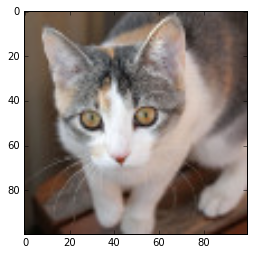

In [38]:
# load an image and convert to a matrix
image = Image.open('test_images/cat.jpg')
image.load()
image_matrix_int32 = np.asarray(image, dtype="int32")
image_matrix = np.asarray(image)
plt.imshow(image_matrix)
image_matrix.shape

In [39]:
model.predict(np.expand_dims(image_matrix.T, axis=0))

array([[ 0.,  1.]])